In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 

import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt

In [2]:
## load the data and split with 70:30 for train and test respectively

(trainX, trainY), (testX, testY) = cifar10.load_data()
X = np.concatenate((trainX,testX), axis=0)
y = np.concatenate((trainY,testY), axis=0)


from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.3, random_state = 42)

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
## convert into categorical data

trainY = keras.utils.to_categorical(trainY,10)
testY = keras.utils.to_categorical(testY,10)

In [6]:
print(trainY.shape)
print(y[0])

(42000, 10)
[6]


#(a) No BatchNormalization

In [ ]:
model_a=Sequential()
model_a.add(Conv2D(128, 5, padding='same', activation='relu', input_shape=[32,32,3]))
model_a.add(MaxPooling2D(pool_size=2,strides=2, padding="valid"))
model_a.add(Flatten())
model_a.add(tf.keras.layers.Dense(units= 64,activation="relu"))
model_a.add(tf.keras.layers.Dense(units= 10,activation='softmax'))
opt = keras.optimizers.SGD(learning_rate=0.001)
model_a.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
model_a.summary()
print("\n\n\n")

hist_a = model_a.fit(trainX, trainY, 
          validation_data=(trainX, trainY), 
          epochs=10, 
          verbose=2)

scores_a = model_a.evaluate(testX, testY, verbose=0)
print("\n\nAccuracy: %.2f%%" % (scores_a[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       9728      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2097216   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 2,107,594
Trainable params: 2,107,594
Non-trainable params: 0
_________________________________________________________________




Epoch 1/10
1313/1313 - 6s - loss: 3.2775 - accuracy: 0.3100 - val_loss: 1.7525 - val_accuracy: 0.3687
Epoc

# (b) Two Dense Layers

In [ ]:
model_b=Sequential()

model_b.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=[32,32,3]))
model_b.add(BatchNormalization())
model_b.add(MaxPooling2D(pool_size=2,strides=1, padding="valid"))
model_b.add(Flatten())
model_b.add(tf.keras.layers.Dense(units= 64,activation="relu"))
model_b.add(tf.keras.layers.Dense(units= 10,activation='softmax'))
opt = keras.optimizers.SGD(learning_rate=0.001)
model_b.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
model_b.summary()
print("\n\n\n")


hist_b = model_b.fit(trainX, trainY, 
          validation_data=(trainX, trainY), 
          batch_size=128,
          epochs=10, 
          verbose=2)


scores_b = model_b.evaluate(testX, testY, verbose=0)
print("Accuracy: %.2f%%" % (scores_b[1]*100))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                1968192   
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 1,969,866
Trainable params: 1,969,802
Non-trainable params: 64
___________________________________________

# (c) 2 blocks of (Conv2D, BatchNorm2D, MaxPooling2D)

In [ ]:
model_c=Sequential()

model_c.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=[32,32,3]))
model_c.add(BatchNormalization())
model_c.add(MaxPooling2D(pool_size=2,strides=1, padding="valid"))

model_c.add(Conv2D(64, 3, padding='same', activation='relu'))
model_c.add(BatchNormalization())
model_c.add(MaxPooling2D(pool_size=2,strides=1, padding="valid"))

model_c.add(Flatten())
model_c.add(tf.keras.layers.Dense(units= 64,activation="relu"))
model_c.add(tf.keras.layers.Dense(units= 10,activation='softmax'))
opt = keras.optimizers.SGD(learning_rate=0.001)
hist_c = model_c.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
model_c.summary()
print("\n\n\n")


model_c.fit(trainX, trainY, 
          validation_data=(trainX, trainY), 
          epochs=50, 
          batch_size=128,
          verbose=2)

scores_c = model_c.evaluate(testX, testY, verbose=0)
print("Accuracy: %.2f%%" % (scores_c[1]*100))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
batch_normalization_23 (Batc (None, 31, 31, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 57600)           

# (d) 3 blocks of (Conv2D, BatchNorm2D, MaxPooling2D)

In [ ]:
model_d=Sequential()

model_d.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=[32,32,3]))
model_d.add(BatchNormalization())
model_d.add(MaxPooling2D(pool_size=2,strides=1, padding="valid"))

model_d.add(Conv2D(64, 3, padding='same', activation='relu'))
model_d.add(BatchNormalization())
model_d.add(MaxPooling2D(pool_size=2,strides=1, padding="valid"))

model_d.add(Conv2D(128, 3, padding='same', activation='relu'))
model_d.add(BatchNormalization())
model_d.add(MaxPooling2D(pool_size=2,strides=1, padding="valid"))

model_d.add(Flatten())
model_d.add(tf.keras.layers.Dense(units= 64,activation="relu"))
model_d.add(tf.keras.layers.Dense(units= 10,activation='softmax'))
opt = keras.optimizers.SGD(learning_rate=0.001)
model_d.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
model_d.summary()
print("\n\n\n")


hist_d = model_d.fit(trainX, trainY, 
          validation_data=(trainX, trainY), 
          epochs=50, 
          batch_size=128,
          verbose=2)

scores_d = model_d.evaluate(testX, testY, verbose=0)
print("Accuracy: %.2f%%" % (scores_d[1]*100))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_30 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
batch_normalization_31 (Batc (None, 31, 31, 64)        256       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 30, 30, 128)     

## Saving the best model
- Model with 3 blocks of (Conv2d, BatchNorm,Maxpool) is giving more accuract i.e., 68%
- Saving that model

In [ ]:
## Save the model
model_d.save("/content/drive/MyDrive/SMAI_Assignment3/q1.h5")

In [ ]:
## Import the trained model
saved_model = keras.models.load_model("/content/drive/MyDrive/SMAI_Assignment3/q1.h5")

In [ ]:
saved_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_30 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
batch_normalization_31 (Batc (None, 31, 31, 64)        256       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 30, 30, 128)     

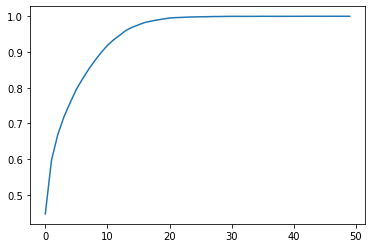

In [ ]:
epoch = np.arange(50)
accuracies = hist_d.history['accuracy']
plt.plot(epoch,accuracies)
plt.show()